In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
base = pd.read_csv('house_prices.csv', sep='|')
base.head()

,tamanho,localizacao,quantidade_quartos,price
0,150,Centro,4,950000
1,200,Vila,1,450000
2,250,Centro,2,750000
3,300,Suburbio,3,1000000
4,350,Vila,4,1000000


In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['tamanho', 'quantidade_quartos', 'price']), # numeric features
        ('cat', OneHotEncoder(), ['localizacao']) # categorical features
    ])

In [62]:
# Aplicar a transformação das categorias e nivelamento dos dados
base_transformed = preprocessor.fit_transform(base)
base_transformed_df = pd.DataFrame(base_transformed, columns=['price_scaled', 'tamanho_scaled', 'quantidade_quartos_scaled', 'localizacao_Centro', 'localizacao_Suburbio', 'localizacao_Vila'])
print(base_transformed_df)

    price_scaled  tamanho_scaled  quantidade_quartos_scaled  \
0      -1.145882        1.330821                   0.551234   
1      -0.756099       -1.330821                  -1.728130   
2      -0.366316       -0.443607                  -0.360512   
3       0.023467        0.443607                   0.779170   
4       0.413249        1.330821                   0.779170   
..           ...             ...                        ...   
93     -0.054490       -1.330821                  -0.907559   
94      0.335293       -0.443607                   0.460059   
95      0.725076        0.443607                   0.779170   
96      1.114859        1.330821                   0.779170   
97      1.504642       -1.330821                   0.779170   

    localizacao_Centro  localizacao_Suburbio  localizacao_Vila  
0                  1.0                   0.0               0.0  
1                  0.0                   0.0               1.0  
2                  1.0                   0.0    

<Axes: >

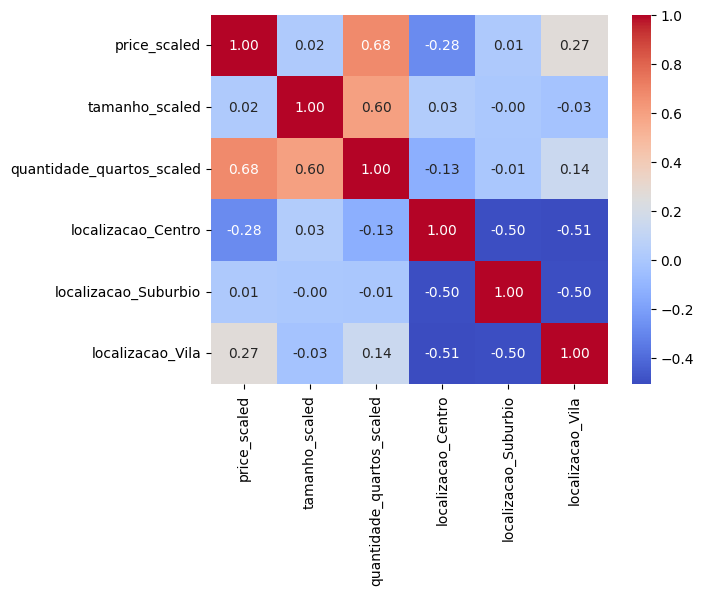

In [64]:
corr = base_transformed_df.corr() # Gerar o Correlograma para verificar a correlação das váriaveis
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [68]:
X = base_transformed_df.drop('price_scaled', axis=1)
y = base_transformed_df['price_scaled']

pipeline = Pipeline(steps=[('model', LinearRegression())])
        

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', LinearRegression())])

In [74]:
y_train_pred = pipeline.predict(X_train)
residuals = y_train - y_train_pred

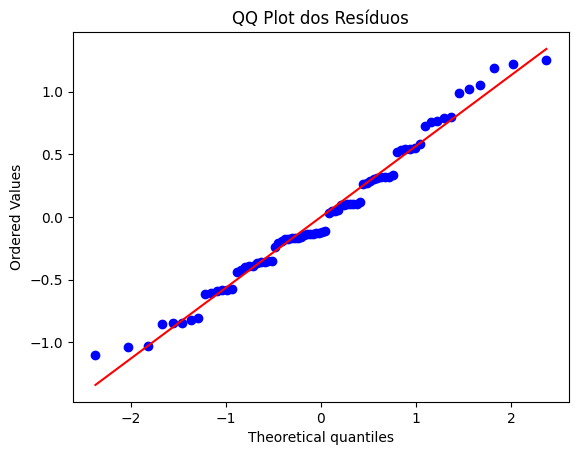

In [75]:

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()

In [70]:
stat, p_value = stats.shapiro(residuals)
print(f'Estatística de Teste: {stat:.3f}')
print(f'Valor-p: {p_value:.3f}')
# Quanto mais proximo de 1 melhor no teste
# Hipotese nula - dados estão normalmente distribuidos
# O valor de p é sabermos se podemos rejeitar a hiposete nulo.
# Se p <= 0.05 eu rejeito.
# Se p > 0.5 eu não rejeito a hipotese nula.  <- Nosso caso é 0.191
# ou seja, os nosso dados não estão normalmente distribuidos.

Estatística de Teste: 0.978
Valor-p: 0.191


In [81]:
# Código Final
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['tamanho', 'quantidade_quartos']), # numeric features
        ('cat', OneHotEncoder(), ['localizacao']) # categorical features
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('model', LinearRegression())])

data = pd.read_csv('house_prices.csv', sep='|')
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# Teste
features = [400, 'Centro', 2]
features = pd.DataFrame([features], columns=['tamanho', 'localizacao', 'quantidade_quartos'])
price = pipeline.predict(features)[0]
print(f"R$ {price:,.2f}")

R$ 896,983.92
